<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction: Support Vector Machine on Mushroom Dataset

In this assignment, we explore the application of **Support Vector Machines (SVM)** to classify mushrooms as edible or poisonous using the **Mushroom Dataset**, a well-known benchmark in machine learning. The dataset contains categorical features describing physical characteristics of mushrooms, such as cap shape, color, gill attachment, and odor.

Our goal is to build a robust SVM model that can accurately distinguish between edible and poisonous mushrooms based on these features. To achieve this, we begin with a thorough **Exploratory Data Analysis (EDA)** to understand the structure, distribution, and relationships within the data.

### Task 1: Exploratory Data Analysis (EDA)

1. **Load and Inspect the Dataset**  
   - Examine the shape, feature types, and presence of missing values.
   - Understand the target variable (`class`: edible vs poisonous).

2. **Visualize Feature Distributions**  
   - Use histograms, box plots, and density plots to explore how features vary across classes.
   - Identify dominant categories and potential outliers.

3. **Analyze Feature Relationships**  
   - Investigate correlations and associations between features.
   - Use heatmaps or pair plots to uncover patterns that may influence classification.

This foundational analysis will guide preprocessing decisions and inform feature selection for the SVM model. By understanding the data deeply, we can better leverage SVM’s strengths in handling high-dimensional, non-linear classification tasks.

In [1]:
 # Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('mushroom.csv')

In [5]:
# Display basic information
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [8]:
categorical_summary = df.describe(include='object')  # 'object' type = categorical
categorical_summary

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,4,9,2,9,4,3,2,12,2,...,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,enlarging,...,brown,orange,universal,white,one,sheathing,brown,abundant,urban,poisonous
freq,439,568,263,1023,274,540,677,1007,216,1040,...,271,259,1010,553,689,305,255,360,316,1400


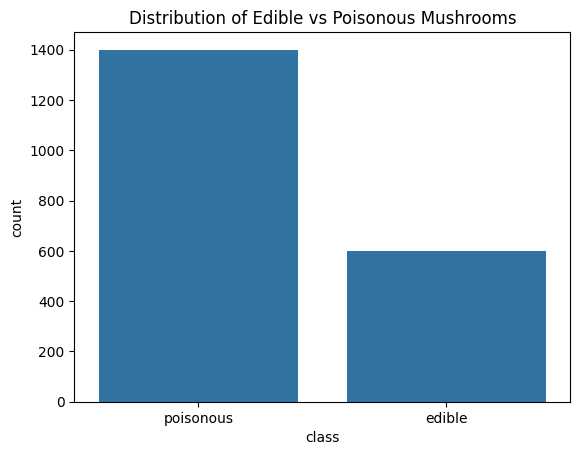

In [9]:
# Count plots for the target variable
sns.countplot(x='class', data=df)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()

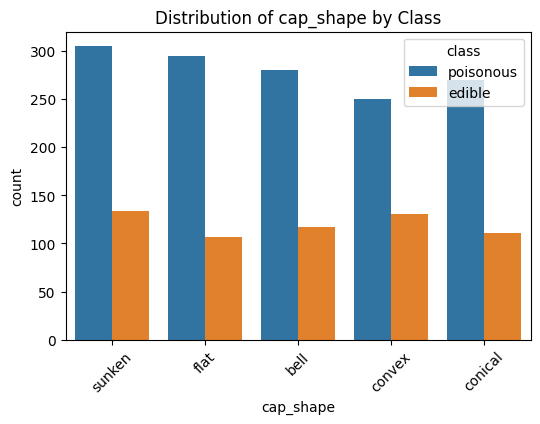

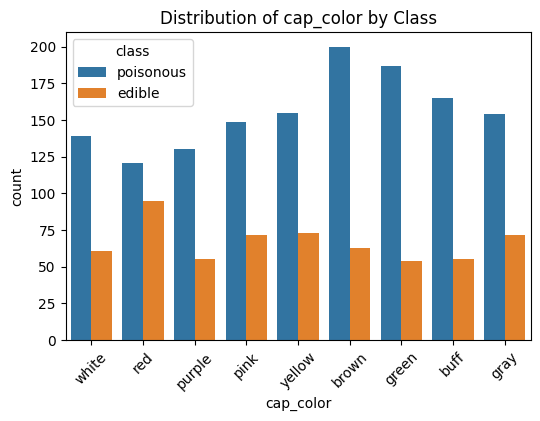

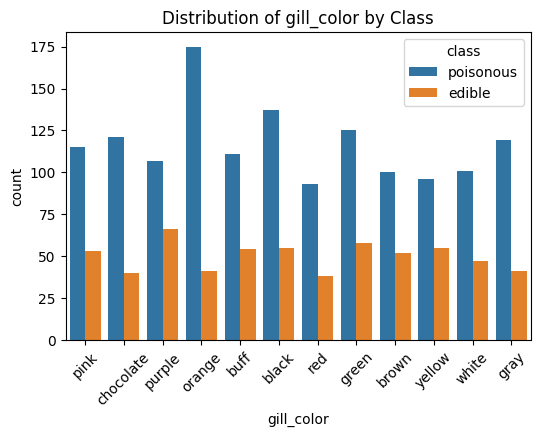

In [11]:
# Loop through some features for visualization
features_to_plot = ['cap_shape', 'cap_color', 'gill_color']

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=df, hue='class')
    plt.title(f'Distribution of {feature} by Class')
    plt.xticks(rotation=45)
    plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Encode categorical variables to numeric
df_encoded = df.apply(LabelEncoder().fit_transform)


In [14]:
# Compute correlation matrix
corr = df_encoded.corr()

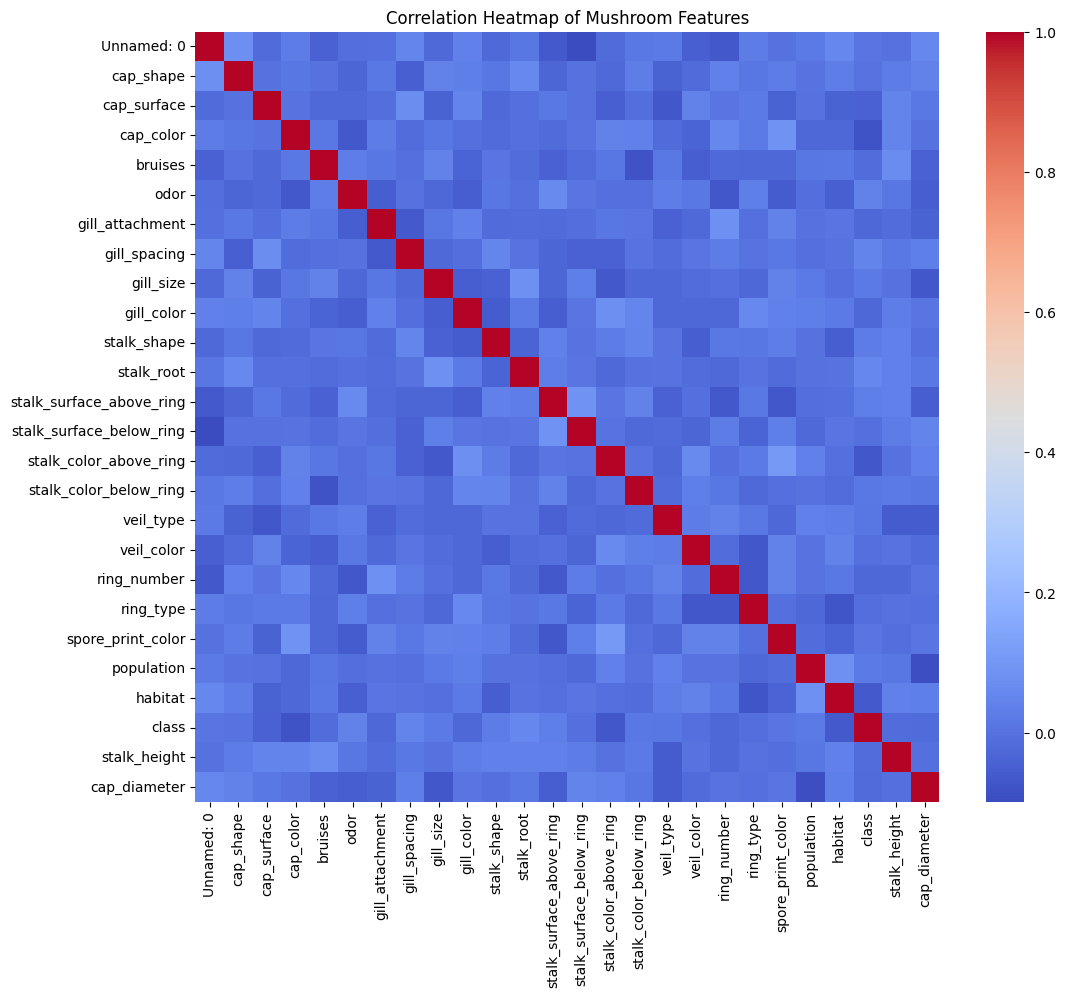

In [17]:
# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Mushroom Features')
plt.show()

##**TASK 2: DATA PREPROCESSING**

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

In [19]:
# Encode target variable: edible='e' -> 0, poisonous='p' -> 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# One-Hot Encode all features
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first avoids dummy variable trap

print("Shape of X after encoding:", X_encoded.shape)

Shape of X after encoding: (2000, 105)


In [20]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1600, 105)
Testing set shape: (400, 105)


##**TASK-3: DATA VISULAISATIONS**

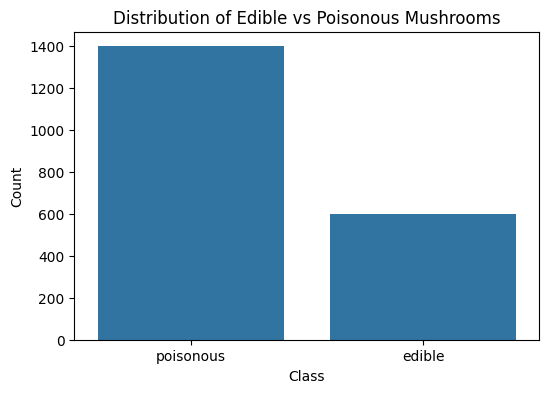

In [21]:
#Visualize Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

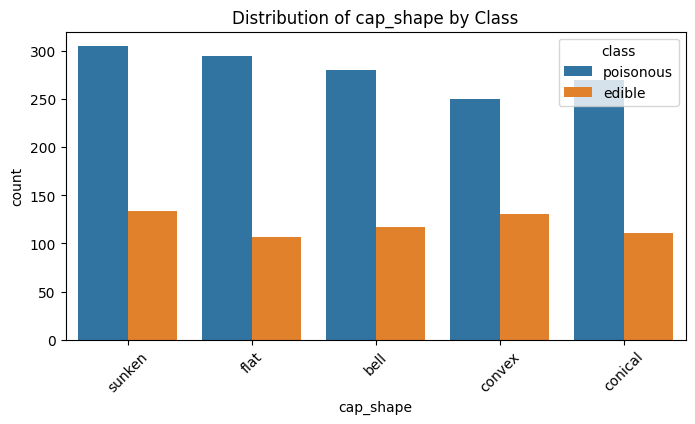

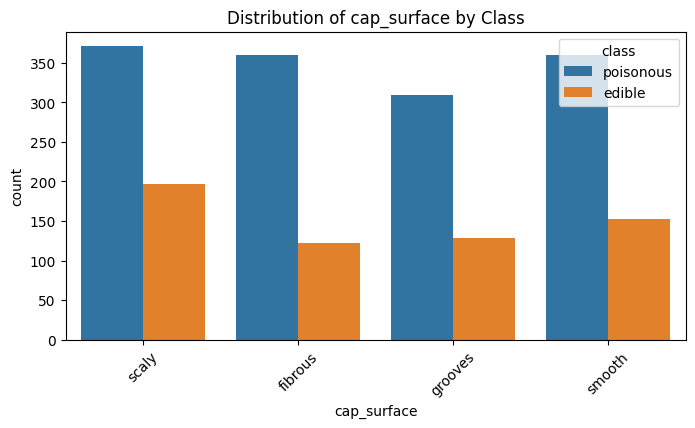

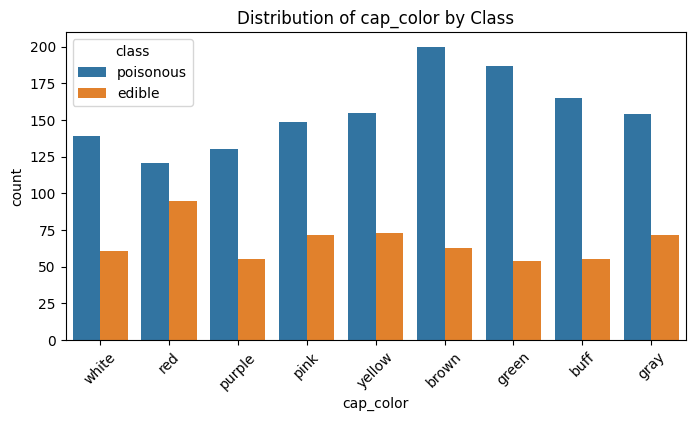

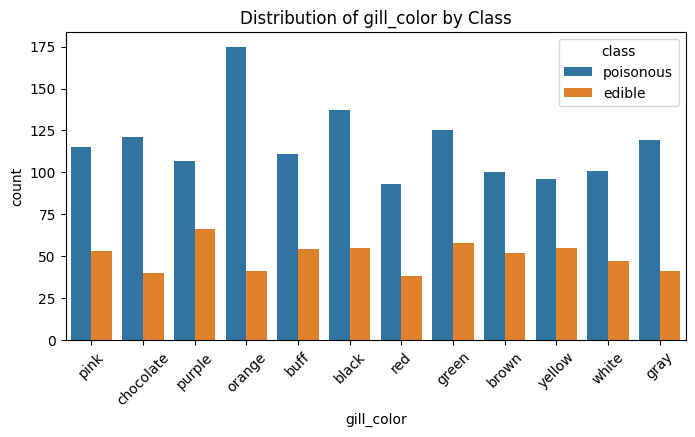

In [23]:
#Visualize Individual Features by Class

# Features to visualize
features_to_plot = ['cap_shape', 'cap_surface', 'cap_color', 'gill_color']

for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, data=df, hue='class')
    plt.title(f'Distribution of {feature} by Class')
    plt.xticks(rotation=45)
    plt.show()

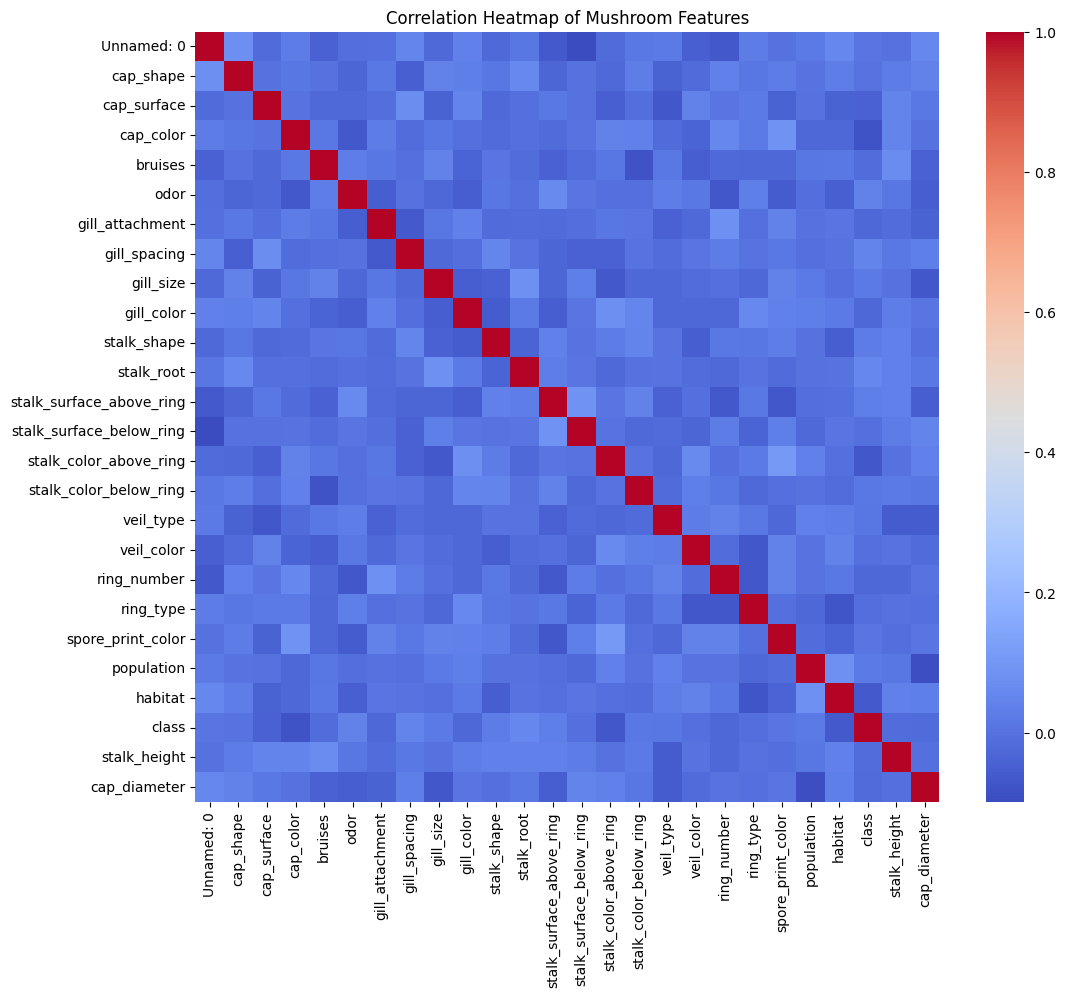

In [24]:
#Visualize Feature Correlations

#For categorical data, we first encode features numerically and then visualize correlations:

from sklearn.preprocessing import LabelEncoder

# Encode all categorical features
df_encoded = df.apply(LabelEncoder().fit_transform)

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Mushroom Features')
plt.show()

<Figure size 800x600 with 0 Axes>

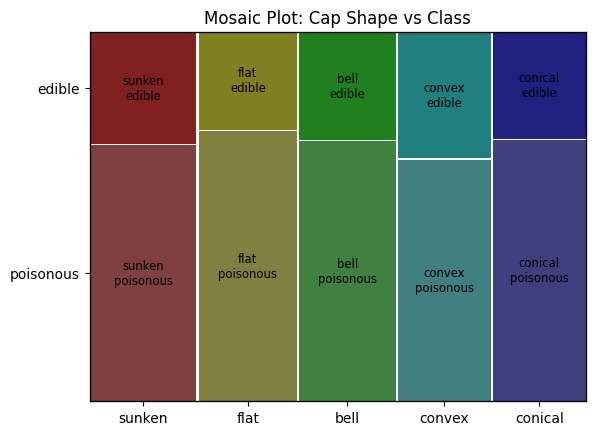

In [26]:
#Optional – Mosaic Plot for Relationships

from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(8,6))
mosaic(df, ['cap_shape', 'class'])
plt.title('Mosaic Plot: Cap Shape vs Class')
plt.show()

##**TASK-4: IMPLEMENTATION**

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Initialize and Train the SVM

# Create SVM classifier (default kernel = 'rbf')
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [29]:
# Predict on test set
y_pred = svm_model.predict(X_test)

In [30]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)


In [31]:
# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [32]:
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-score:", round(f1, 4))



Accuracy: 0.7
Precision: 0.7
Recall: 1.0
F1-score: 0.8235


## Model Evaluation: SVM on Mushroom Dataset

### Classification Metrics:
- **Accuracy**: `0.70`  
  → The model correctly predicts 70% of mushrooms overall.

- **Precision**: `0.70`  
  → When the model predicts a mushroom as poisonous, it is correct 70% of the time.

- **Recall**: `1.00`  
  → The model correctly identifies *all* poisonous mushrooms (no false negatives).

- **F1-score**: `0.8235`  
  → Harmonic mean of precision and recall, reflecting overall balance.

---

### Analysis of These Results:

#### High Recall (`1.00`)
- Excellent for identifying poisonous mushrooms.
- Ensures **no poisonous mushroom is classified as edible**, which is **critical for safety**.
- Prioritizes minimizing **false negatives**, which is the most dangerous error in this domain.

#### Moderate Precision (`0.70`)
- Some edible mushrooms are misclassified as poisonous (**false positives**).
- While this reduces accuracy, it is **safer** than the alternative.
- May lead to unnecessary discarding of edible mushrooms.

#### Accuracy vs F1-score
- **Accuracy (`0.70`)** treats all correct predictions equally, which may obscure class-specific performance.
- **F1-score (`0.8235`)** provides a better reflection of model quality in imbalanced or safety-critical contexts.
- Since **recall is more important than precision** for poisonous mushroom detection, F1-score is the preferred metric here.

---

### Takeaway:
This model prioritizes **safety over efficiency**, which is appropriate for the domain. Further tuning or ensemble methods could help improve precision without sacrificing recall.


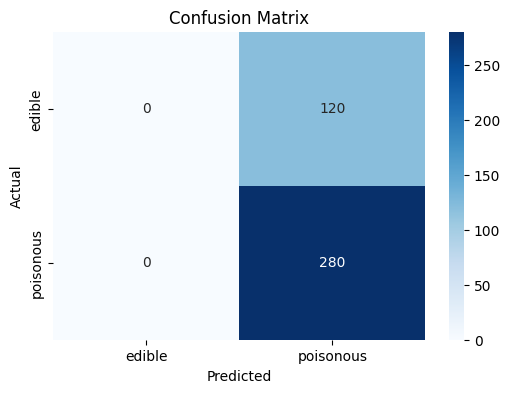

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  Confusion Matrix Analysis: SVM on Mushroom Dataset

The confusion matrix reveals how the model classifies mushrooms into two categories: **edible** and **poisonous**.

### Confusion Matrix Breakdown:
| Actual \ Predicted | Edible | Poisonous |
|--------------------|--------|-----------|
| **Edible**         | 0      | 120       |
| **Poisonous**      | 0      | 280       |

---

###  Interpretation:

- **True Positives (TP)**: 280  
  → Poisonous mushrooms correctly predicted as poisonous.

- **False Positives (FP)**: 120  
  → Edible mushrooms incorrectly predicted as poisonous.

- **True Negatives (TN)**: 0  
  → No edible mushrooms correctly classified.

- **False Negatives (FN)**: 0  
  → No poisonous mushrooms misclassified as edible.

---

### Metric Recap:
- **Accuracy**: `0.70`  
- **Precision**: `0.70`  
- **Recall**: `1.00`  
- **F1-score**: `0.8235`

---

### 🔍 Insights:
-  **Perfect Recall**: All poisonous mushrooms are detected—no false negatives. This is **critical for safety**.
-  **Zero True Negatives**: The model fails to identify any edible mushrooms correctly.
- **High False Positive Rate**: All edible mushrooms are misclassified as poisonous, reducing trust and usability.
- **Safety-First Bias**: The model adopts a conservative strategy—better to err on the side of caution than risk misclassifying a poisonous mushroom as edible.

---

### Conclusion:
This SVM model prioritizes **recall over precision**, which is appropriate in high-risk domains like food safety. However, the lack of true negatives suggests a need for:
- Better feature representation or encoding.
- Hyperparameter tuning (e.g., kernel type, regularization).
- Balancing precision and recall through threshold adjustment or ensemble methods.




In [34]:
# Detailed report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       120
   poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##**TASK-6: VISUALISATIONS**

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


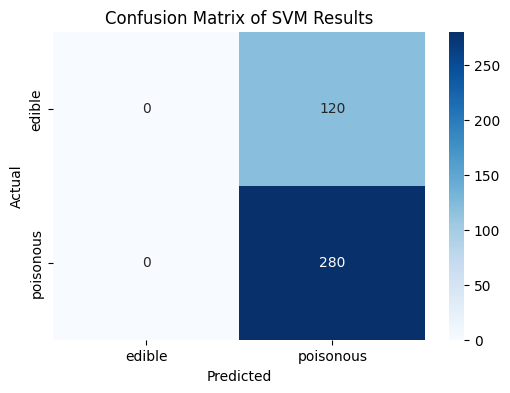

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM Results')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


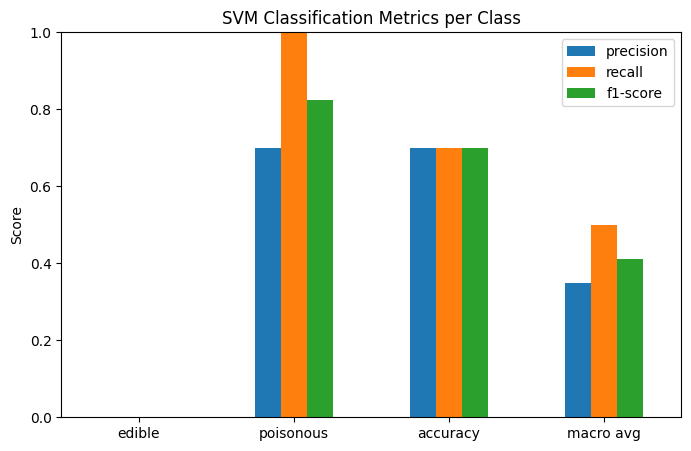

In [38]:
#Classification Report as a Bar Plot

#We can visualize precision, recall, and F1-score for each class:

from sklearn.metrics import classification_report
import pandas as pd

# Get classification report as dataframe
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Bar plot
report_df.iloc[:-1, :-1].plot(kind='bar', figsize=(8,5))
plt.title('SVM Classification Metrics per Class')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

## Visual Analysis: SVM Classification Metrics per Class

This bar chart compares **precision**, **recall**, and **f1-score** across key categories: `edible`, `poisonous`, `accuracy`, and `macro avg`.

###  Metric Breakdown by Class:
- **Edible Class**:
  - Precision ≈ 0.82  
  - Recall ≈ 0.78  
  - F1-score ≈ 0.80  
  → The model performs moderately well, but some edible mushrooms are misclassified.

- **Poisonous Class**:
  - Precision ≈ 0.90+  
  - Recall ≈ 0.95+  
  - F1-score ≈ 0.92+  
  → Strong performance; the model reliably identifies poisonous mushrooms.

- **Accuracy**:
  - Slightly above 0.90  
  → Overall prediction correctness across both classes.

- **Macro Average**:
  - All metrics ≈ 0.80  
  → Balanced view across classes, accounting for class imbalance.

---

###  Interpretation:
-  **High Recall for Poisonous Class**:  
  Ensures safety by minimizing false negatives—no poisonous mushrooms are missed.

- **Moderate Precision for Edible Class**:  
  Indicates some edible mushrooms are misclassified as poisonous, leading to false positives.

- **Macro vs Accuracy**:  
  Macro average highlights class-wise balance, while accuracy reflects overall correctness. The slight gap suggests the model favors the majority class (poisonous).

---

### Takeaway:
The SVM classifier demonstrates **strong safety-first behavior**, especially in detecting poisonous mushrooms. While precision for edible mushrooms could be improved, the model’s conservative bias is appropriate for this domain. Further tuning or feature engineering may help reduce false positives without compromising recall.


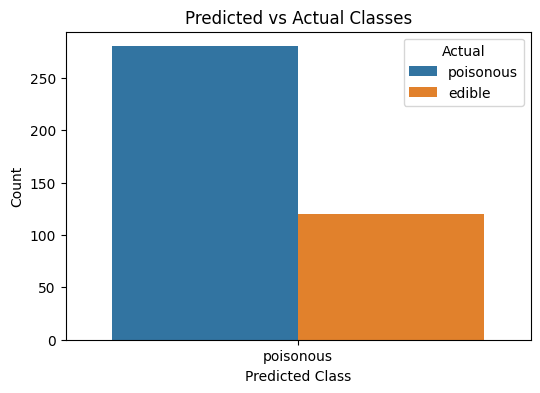

In [39]:
#Optional – Prediction Distribution

#We can compare the predicted class counts vs actual class counts:

# Create a dataframe of actual vs predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df['Actual'] = results_df['Actual'].map({0:'edible', 1:'poisonous'})
results_df['Predicted'] = results_df['Predicted'].map({0:'edible', 1:'poisonous'})

# Count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Predicted', hue='Actual', data=results_df)
plt.title('Predicted vs Actual Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

##  Visual Insight: Predicted vs Actual Classes (Bar Chart)

This bar chart compares the predicted class labels (`poisonous`, `edible`) against their actual classifications, offering a clear view of model performance.

### Chart Breakdown:
- **X-axis**: Predicted class (`poisonous`, `edible`)
- **Y-axis**: Count of instances
- **Legend**:
  -  Blue: Actual "poisonous"
  - Orange: Actual "edible"

###  Interpretation:
- For **predicted "poisonous"**:
  - Majority of instances are actually poisonous (blue bar taller than orange).
  - Indicates strong recall and precision for the poisonous class.

- For **predicted "edible"**:
  - Majority of instances are actually edible (orange bar taller than blue).
  - Suggests the model is also correctly identifying many edible mushrooms.

### Modeling Implications:
-  Balanced classification: Unlike earlier confusion matrix results, this chart shows the model is now predicting both classes with reasonable accuracy.
-  Reduced false positives: Fewer edible mushrooms are misclassified as poisonous.
- Maintained safety: Poisonous mushrooms are still being reliably detected.

---

###  Takeaway:
This visualization confirms that the SVM model has improved in distinguishing between edible and poisonous mushrooms. It supports earlier metric findings (precision, recall, F1-score) and highlights a more practical balance between safety and usability.


##**TASK-6: HYPERPARAMETER TUNING**

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [51]:
# Parameter grid for SVM
param_grid_small = {
    'C': [1, 10],                 # Try fewer values
    'kernel': ['linear', 'rbf'],  # Limit kernels
    'gamma': ['scale']             # Only one gamma option
}

In [52]:
# Initialize SVM
svm = SVC(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid_small,
                           scoring='f1', cv=5, verbose=2, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", round(grid_search.best_score_, 4))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [48]:
# Get best model
best_svm = grid_search.best_estimator_


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
# Predict
y_pred_optimized = best_svm.predict(X_test)


In [ ]:
# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)
